In [ ]:
### Ce notebook reprend le notebook essai_juliette (pour éviter les conflits) puis industries_polluantes_aurélian puis industries_polluantes_juliette

In [4]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 92.5 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [contextily]9 [geopy]io]


In [5]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#### On importe le fichier répertoriant les installations industrielles rejetant des polluants

import requests

# Téléchargement du fichier avec la localisation des installations industrielles rejetant des polluants, directement depuis le site Géorisques
url_industries_polluantes = "https://files.georisques.fr/irep/2023.zip"
response_industries_polluantes = requests.get(url_industries_polluantes)

# Enregistrement du fichier localement
with open("Industries_polluantes.xlsx", "wb") as f:
    f.write(response_industries_polluantes.content)

In [7]:
import zipfile

with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/etablissements.csv") as f:
        industries_polluantes = pd.read_csv(f, sep=None, engine='python')

# On renomme la colonne insee dès maintenant (pour harmoniser ensuite)
industries_polluantes = industries_polluantes.rename(columns={"code_insee" : "insee"})
industries_polluantes.head()

,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,region,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr
0,6101975,COFIBEX,43425026200012,AVENUE DE LA LIBERATION ZONE INDUSTRIELLE,1500,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,881004.00000,6.543304e+06,2154.0,6420Z,Activités des sociétés holding,NaN,NaN
1,9000321,AIA Ambérieu en Bugey,15000028900135,Détachement air 278 d'Ambérieu Avenue du colo...,1508,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34592,4.597117e+01,4326.0,8422Z,Défense,NaN,NaN
2,6100021,THIERRY DANNENMULLER TRANSPORTS LOCATIONS TRAV...,35234119200065,LE PELOUX,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34282,4.602817e+01,4326.0,0811Z,Extraction de pierres ornementales et de const...,NaN,NaN
3,6101980,FERROGLOBE FRANCE,64200517700265,USINE D'ANGLEFORT,1350,01010,ANGLEFORT,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.81144,4.590610e+01,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...
4,6101983,GROSFILLEX SAS,75920110600052,ZI DE LA PLAINE,1100,01014,ARBENT,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.66324,4.628387e+01,4326.0,3109B,Fabrication d'autres meubles et industries con...,NaN,NaN


In [8]:
with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/rejets.csv") as f:
        rejets = pd.read_csv(f, sep=None, engine='python')

rejets = rejets.rename(columns = {"code_insee" : "insee"})

rejets.head()

,identifiant,nom_etablissement,code_postal,insee,commune,code_departement,departement,code_region,region,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,3012489,CARRIERES & MATERIAUX NORD-EST,51150,51303,JALONS,51,MARNE,44,GRAND-EST,2023,NaN,167850.0
1,3012512,ETABLISSEMENTS BLANDIN SA,51300,51433,PLICHANCOURT,51,MARNE,44,GRAND-EST,2023,NaN,59277.0
2,3012705,KNAUF INSULATION LANNEMEZAN,57970,57343,ILLANGE,57,MOSELLE,44,GRAND-EST,2023,0.0,0.0
3,3013146,METABOLIC EXPLORER,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,55597.0,NaN
4,3014130,AFYREN NEOXY,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,7647.0,NaN


In [9]:
# on merge les deux tables
etablissements_rejets = pd.merge(industries_polluantes, rejets, on=["identifiant", "nom_etablissement", "code_postal", "insee",
"commune", "code_departement", "departement", "code_region", "region"], how="inner")
etablissements_rejets.head()

,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,...,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,6101980,FERROGLOBE FRANCE,64200517700265,USINE D'ANGLEFORT,1350,01010,ANGLEFORT,01,AIN,84.0,...,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...,2023,NaN,2253116.0
1,6101989,KEM ONE,53869504000039,258 route de Saint Maurice de Gourdans,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2014Z,Fabrication d'autres produits chimiques organi...,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,685463.0
2,6112329,SK FUNCTIONAL POLYMER,87995793400059,258 route de Saint Maurice de Gourdans,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2016Z,Fabrication de matières plastiques de base,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,94045.0
3,6108136,ELIAN,76020009700060,Z.I. Sud Plastics Vallée - BP 59,1100,01031,BELLIGNAT,01,AIN,84.0,...,5.62876,46.24919,4326.0,2012Z,Fabrication de colorants et de pigments,NaN,NaN,2023,1866.0,NaN
4,6102002,SYND INTERCOMMUNAL DE VALORISATION,25740162000030,"Z.I. d'ARLOD, 5 chemin de Tapey",1200,01033,BELLEGARDE-SUR-VALSERINE,01,AIN,84.0,...,5.81411,46.08494,4326.0,3821Z,Traitement et élimination des déchets non dang...,5.(b),Installations destinées à l'incinération des d...,2023,NaN,25903484.0


In [10]:
#### Et on importe le fichier avec les shapefiles des communes

# Téléchargement du fichier avec les shapefiles des communes, directement depuis Datagouv
url_communes = "https://www.data.gouv.fr/api/1/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165"
zip_communes = "shapefiles.zip"

# Enregistrement du fichier localement
response_communes = requests.get(url_communes)
with open(zip_communes, "wb") as f:
    f.write(response_communes.content)

# Importation avec GeoPandas
communes = gpd.read_file(f"zip://{zip_communes}!communes-20220101.shp")
communes.head()

,insee,nom,wikipedia,surf_ha,geometry
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.3851, 9..."
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.2001 42.39013, 9.20014 42.39014, 9..."
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ..."
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.2512 42.37605, 9.25132 42.37603, 9..."
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.2834 42.66273, 9.28345 42.66273, 9..."


In [11]:
## On veut fusionner le df communes_statut avec des informations tirées de etablissements_rejets
## On a un problème : les arrondissements ne sont pas décrits dans le fichier des communes (mais ils le sont dans etablissements_rejets)

# On fusionne pour Paris, Lyon et Marseille
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["13203", "13205", "13208", "13209", "13210", "13211", "13214", "13215", "13216"],
"13055").astype(str)
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["69383", "69384", "69387", "69388", "69389"],"69123").astype(str)
etablissements_rejets["insee"] = etablissements_rejets["insee"].replace(["75101", "75109", "75111", "75112", "75115"],"75056").astype(str)

# On supprime les autres
etablissements_rejets.drop(etablissements_rejets[etablissements_rejets["insee"].isin(["14443", "27676", "33267", "49204", "49274", "49276", "50163",
"50460", "50602", "61356", "74093", "74181", "85212"])].index, inplace = True)

In [12]:
### Préparation du dataframe de travail

# On fait la jointure
df = pd.merge(communes, etablissements_rejets, on="insee", how = "inner")

# Conversion du fichier au format GeoPandas
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Création d'un dataframe avec seulement les communes polluées
communes_polluees = gdf.copy()
communes_polluees = communes_polluees[communes_polluees["insee"].isin(etablissements_rejets["insee"])]

# On crée un df avec les communes et une variable polluée ou non (binaire)
communes_statut = communes.copy()
communes_statut["Polluee"] = communes_statut["insee"].isin(communes_polluees["insee"])

# On regarde combien on en a (2 373 polluées parmi 34 955 : environ 7% (c'est bien !?))
print(communes_statut["Polluee"].sum(), communes.shape)

2378 (34955, 5)


In [13]:
## On va réduire le df etablissements_rejets

# On regarde la taille et combien de communes uniques
print(etablissements_rejets.shape, etablissements_rejets["insee"].nunique(), etablissements_rejets.columns)

# On regroupe par la commune et on somme les rejets
etablissements_rejets_agr = etablissements_rejets.groupby("insee").agg(
    rejets_tot=("rejet_isole_m3_par_an", "sum"),
    nb_etablissements=("rejet_isole_m3_par_an", "count")
).reset_index()

(3915, 21) 2386 Index(['identifiant', 'nom_etablissement', 'numero_siret', 'adresse',
       'code_postal', 'insee', 'commune', 'code_departement', 'departement',
       'code_region', 'region', 'coordonnees_x', 'coordonnees_y', 'code_epsg',
       'code_ape', 'libelle_ape', 'code_eprtr', 'libelle_eprtr', 'annee_rejet',
       'rejet_raccorde_m3_par_an', 'rejet_isole_m3_par_an'],
      dtype='object')


In [14]:
# On fusionne etablissements_rejets_agr et communes_statut
communes_statut = pd.merge(communes_statut, etablissements_rejets_agr, on = "insee")

# On ne conserve que les villes qui ont un rejet isolé positif
communes_statut = communes_statut[communes_statut["rejets_tot"] > 0]

In [15]:
### On se concentre sur l'idf

# On crée un df communes seulement avec l'idf
communes["departement"] = communes["insee"].astype(str).str.slice(0,2)
communes_idf = communes.copy()
communes_idf = communes_idf[communes_idf["departement"].isin(["75", "77", "78", "91", "92", "93", "94", "95"])]

communes_polluees["departement"] = communes_polluees["insee"].astype(str).str.slice(0,2)
communes_polluees_idf = communes_polluees.copy()
communes_polluees_idf = communes_polluees_idf[communes_polluees_idf["departement"].isin(["75", "77", "78", "91", "92", "93", "94", "95"])]

# On crée un df avec les communes d'IDF et une variable polluée ou non (binaire)
communes_idf_statut = communes_idf.copy()
communes_idf_statut["Polluee"] = communes_idf["insee"].isin(communes_polluees_idf["insee"])

# On regarde combien on en a (157 polluées parmi 1 268 : environ 10% (c'est cool !))
print(communes_idf_statut["Polluee"].sum(), communes_idf.shape)

159 (1268, 6)


In [16]:
# On s'assure qu'on a bien un GeoDataFrame et on charge l'epsg=2154
communes_idf_statut = gpd.GeoDataFrame(communes_idf_statut)
communes_idf_statut = communes_idf_statut.to_crs(epsg=2154)

# On crée le graphique
fig, ax = plt.subplots(figsize=(10, 10))

communes_idf_statut.plot(ax=ax, color='lightgrey', edgecolor='white')

communes_idf_statut[communes_idf_statut["Polluee"]].plot(
    ax=ax,
        color='red',
            edgecolor='black',
                linewidth=0.3,
                    alpha=0.8
                    )

                    ax.set_title("Communes d'Ile-de-France avec industries polluantes", fontsize=14)
                    ax.axis('off')

                    plt.show()
                    

IndentationError: unexpected indent (2218339912.py, line 18)

In [17]:
#### On importe le dossier complet de l'INSEE pour apparier avec des données "sociales"

# On télécharge le dossier qui contient notre csv
url_complet = "https://www.insee.fr/fr/statistiques/fichier/5359146/dossier_complet.zip"
zip_path = "dossier_complet.zip" 

# On enregistre le fichier localement
response = requests.get(url_complet)
with open(zip_path, "wb") as f:
    f.write(response.content)

# On importe notre fichier avec Pandas (et on l'appelle complet_insee)
csv_complet_insee = "dossier_complet.csv" 
with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_complet_insee) as f:
        complet_insee = pd.read_csv(f, sep=';', encoding='utf-8')

/tmp/ipykernel_2734/1042689086.py:16: DtypeWarning: Columns (0,1701,1702) have mixed types. Specify dtype option on import or set low_memory=False.
  complet_insee = pd.read_csv(f, sep=';', encoding='utf-8')


In [18]:
#### On fait à nouveau la jointure avec notre df précédent

# On renomme la variable CODGEO en "insee" pour que ce soit homogène
complet_insee = complet_insee.rename(columns={"CODGEO":"insee"})

# On s'assure que la variable "insee" est similaire dans les deux tableaux
communes_idf_statut['insee'] = communes_idf_statut['insee'].astype(str).str.zfill(5)                     # zfill remplit de zéros à gauche pour atteindre 5 signes (pour harmoniser à la norme INSEE)
complet_insee['insee'] = complet_insee['insee'].astype(str).str.zfill(5)

# On fusionne
communes_idf_complet = pd.merge(communes_idf_statut, complet_insee, on="insee") # on obtient un tableau à 1982 colonnes (et 1 267 lignes)
communes_idf_complet.shape


(1267, 1982)

In [19]:
#### Notre super gdf contient 1980 colonnes : on prend la pauvreté uniquement pour la visualiser
## NB : on pourra essayer avec beaucoup d'autres indicateurs plus tard !!!

# On ne retient que les variables d'intérêt
communes_idf_pauvrete = communes_idf_complet.copy()
communes_idf_pauvrete = communes_idf_pauvrete[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021']]

# On renomme TP6021 en taux_pauvrete
communes_idf_pauvrete = communes_idf_pauvrete.rename(columns = {"TP6021" : "taux_pauvrete"})

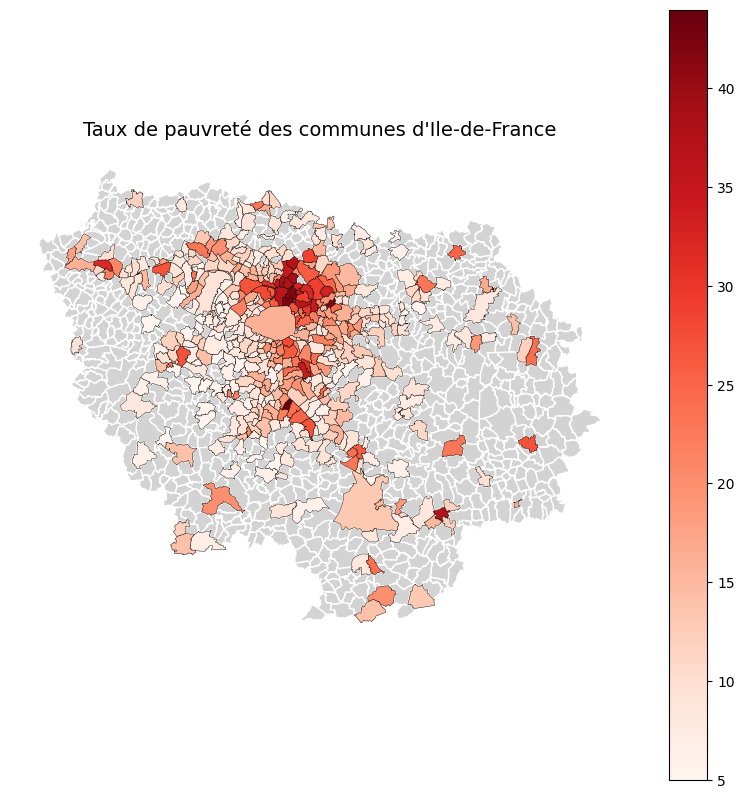

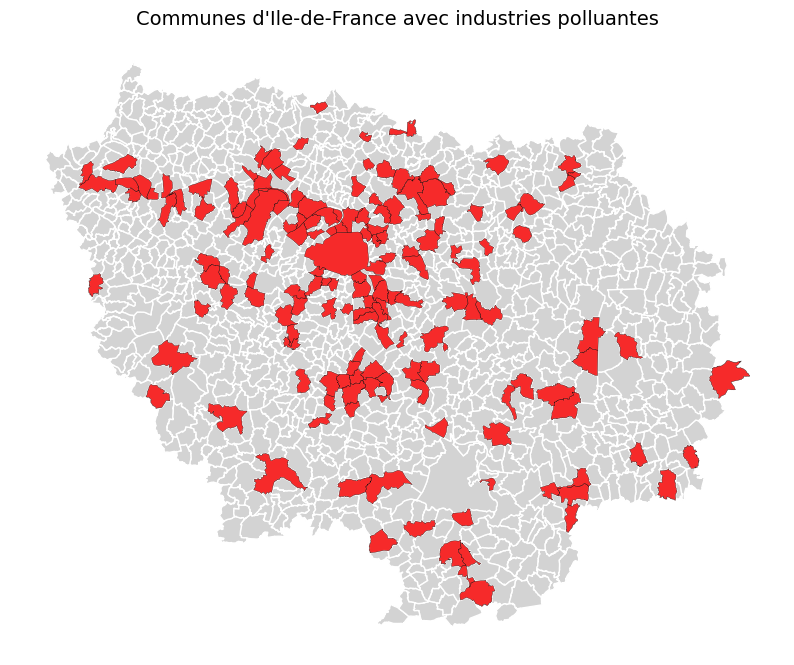

In [20]:
#### On visualise comme d'habitude

import re

# On s'assure qu'on a bien un GeoDataFrame 
communes_idf_pauvrete = gpd.GeoDataFrame(communes_idf_pauvrete)

# Nettoyage de la colonne taux_pauvrete
def clean_numeric(val):
    if val is None:
        return None
    val = str(val)
    val = re.sub(r'[^0-9\.,-]', '', val)  
    val = val.replace(',', '.')            
    try:
        return float(val)
    except:
        return None

communes_idf_pauvrete['taux_pauvrete'] = communes_idf_pauvrete['taux_pauvrete'].apply(clean_numeric)

# On charge l'epsg
communes_idf_pauvrete = communes_idf_pauvrete.to_crs(epsg=2154)

# On crée le graphique
fig, ax = plt.subplots(figsize=(10, 10))

communes_idf_pauvrete.plot(ax=ax, color='lightgrey', edgecolor='white')

communes_idf_pauvrete.plot(
    column="taux_pauvrete",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.3,
    ax=ax
)

ax.set_title("Taux de pauvreté des communes d'Ile-de-France", fontsize=14)
ax.axis('off')

plt.show()

# On met en dessous le graphique sur la pollution
fig, ax = plt.subplots(figsize=(10, 10))
communes_idf_statut.plot(ax=ax, color='lightgrey', edgecolor='white')
communes_idf_statut[communes_idf_statut["Polluee"]].plot(
    ax=ax,
    color='red',
    edgecolor='black',
    linewidth=0.3,
    alpha=0.8
)
ax.set_title("Communes d'Ile-de-France avec industries polluantes", fontsize=14)
ax.axis('off')
plt.show()

In [21]:
### On voudrait tester tout ça !!

import numpy as np

# On crée un df avec le taux de pauvreté (si connu) et la pollution (variable binaire), et on le nettoie
communes_idf_pollution_pauvrete = communes_idf_complet.copy()
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021', 'Polluee']]
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete.rename(columns={"TP6021" : "taux_pauvrete"})
communes_idf_pollution_pauvrete["taux_pauvrete"] = communes_idf_pollution_pauvrete["taux_pauvrete"].replace("s", np.nan
).str.replace(",", ".", regex = False).astype(float)

# On construit un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reg_pauvrete_pollution = LinearRegression()
communes_idf_pollution_pauvrete = communes_idf_pollution_pauvrete.dropna(subset=["taux_pauvrete"])
reg_pauvrete_pollution.fit(communes_idf_pollution_pauvrete[["Polluee"]],communes_idf_pollution_pauvrete["taux_pauvrete"])
a = reg_pauvrete_pollution.coef_
b = reg_pauvrete_pollution.intercept_
print(a,b)

# On teste statistiquement la significativité par un t-test
from scipy.stats import ttest_ind
pauvrete_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 1, "taux_pauvrete"]
pauvrete_non_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 0, "taux_pauvrete"]
t_stat, p_value = ttest_ind(pauvrete_polluee, pauvrete_non_polluee, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")

# On fait la même chose avec un test de Cohen
mean1 = pauvrete_polluee.mean()
mean0 = pauvrete_non_polluee.mean()
std1 = pauvrete_polluee.std()
std0 = pauvrete_non_polluee.std()
n1 = len(pauvrete_polluee)
n0 = len(pauvrete_non_polluee)
s_pooled = np.sqrt(((n1-1)*std1**2 + (n0-1)*std0**2) / (n1+n0-2))
cohens_d = (mean1 - mean0) / s_pooled
print("Cohen's d:", cohens_d)

# On calcule le R^2
eta_squared = t_stat**2 / (t_stat**2 + n1 + n0 - 2)
print("eta squared:", eta_squared)

## On fait une régression logistique
import statsmodels.api as sm
y_polluee_idf = communes_idf_pollution_pauvrete["Polluee"] # variable "expliquée"
X_pauvrete_idf = communes_idf_pollution_pauvrete["taux_pauvrete"] # variable "explicative"
X_pauvrete_idf = sm.add_constant(X_pauvrete_idf) # on ajoute l'intercept
logit_model = sm.Logit(y_polluee_idf, X_pauvrete_idf)
result = logit_model.fit()
print(result.summary())
# Coefficients du modèle
params = result.params
# Odd-ratios
odds_ratios = np.exp(params)
print("Odds ratios :")
print(odds_ratios)
#IC des odd-ratios
conf = result.conf_int()
conf_odds_ratios = np.exp(conf)
conf_odds_ratios.columns = ["2.5%", "97.5%"]
print("\nIntervalles de confiance des odds ratios :")
print(conf_odds_ratios)
# Pseudo R^2
pseudo_r2 = 1 - result.llf / result.llnull
print("\nPseudo R² (McFadden) :", pseudo_r2)


[4.83697456] 11.991150442477876
t-statistic: 5.548, p-value: 9.621e-08
Cohen's d: 0.6398022026153118
eta squared: 0.062080414185888666
Optimization terminated successfully.
         Current function value: 0.551838
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Polluee   No. Observations:                  467
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Dec 2025   Pseudo R-squ.:                 0.06036
Time:                        21:09:56   Log-Likelihood:                -257.71
converged:                       True   LL-Null:                       -274.26
Covariance Type:            nonrobust   LLR p-value:                 8.723e-09
                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [22]:
# On ouvre le df avec la pollution de l'air
url_pollution_air = "https://www.data.gouv.fr/api/1/datasets/r/da7a4869-b584-48ad-8a81-784a02eb297a"
pollution_air = pd.read_csv(url_pollution_air) 
pollution_air.shape

# On se restreint aux mesures de 2018 (les plus récentes)
pollution_air_2018 = pollution_air[pollution_air['date'] == '01/04/2018'].copy()

# S'assurer que la colonne est bien au format string
pollution_air_2018['ninsee'] = pollution_air_2018['ninsee'].astype(str)

# Garder seulement les codes INSEE de 5 chiffres ou plus
pollution_air_2018 = pollution_air_2018[pollution_air_2018['ninsee'].str.len() >= 5]


In [23]:
#### On fait à nouveau la jointure avec notre df précédent

# On renomme la variable CODGEO en "insee" pour que ce soit homogène
pollution_air_2018 = pollution_air_2018.rename(columns={"ninsee":"insee"})

# On s'assure que la variable "insee" est similaire dans les deux tableaux
communes_idf_complet['insee'] = communes_idf_complet['insee'].astype(str).str.zfill(5)  # zfill remplit de zéros à gauche pour atteindre 5 signes (pour harmoniser à la norme INSEE)
pollution_air_2018['insee'] = pollution_air_2018['insee'].astype(str).str.zfill(5)

# On fusionne
communes_idf_pollution = pd.merge(communes_idf_complet, pollution_air_2018, on="insee") 
communes_idf_pollution.shape

(1266, 1986)

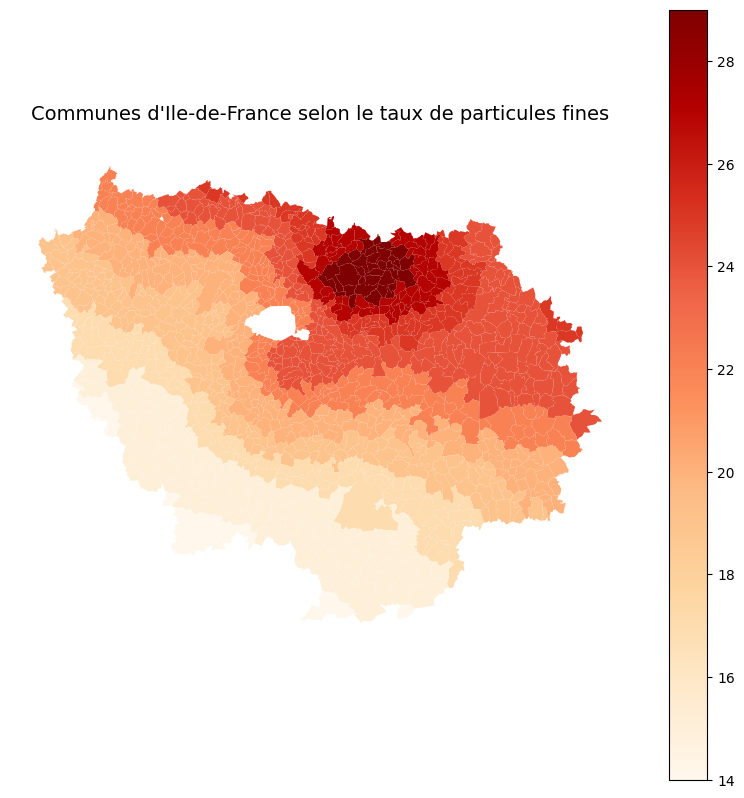

In [24]:
# On s'assure qu'on a bien un GeoDataFrame et on charge l'epsg=2154
communes_idf_pollution= gpd.GeoDataFrame(communes_idf_pollution)
communes_idf_pollution= communes_idf_pollution.to_crs(epsg=2154)

# On crée les axes
fig, ax = plt.subplots(figsize=(10, 10))

# On projette le fonds gris
communes_idf_pollution.plot(ax=ax, color='lightgrey', edgecolor='white')

# On colorie selon le taux de PM10
communes_idf_pollution.plot(
    ax=ax,
    column="pm10",
    legend=True,
    cmap="OrRd",
)

# On donne un titre
ax.set_title("Communes d'Ile-de-France selon le taux de particules fines", fontsize=14)
ax.axis('off')

plt.show()


In [25]:
!pip install libpysal
!pip install esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 74.8 MB/s  0:00:00


In [26]:
### On est surpris que la relation soit si claire : on vérifie le tout !

# On commence par vérifier que ce n'est pas une erreur de visualisation, et qu'on trouve bien un lien dans les données entre la localisation et les PM10
communes_idf_pollution['centroid'] = communes_idf_pollution.geometry.centroid # on crée une variable avec le centroïd pour chaque ville
communes_idf_pollution['x'] = communes_idf_pollution.centroid.x # on enregistre ses coordonnées est-ouest (longitude)
communes_idf_pollution['y'] = communes_idf_pollution.centroid.y # idem en nord-sud (latitude)
communes_idf_pollution[['x', 'pm10']].corr() # on mesure la corrélation longitude / pm10
communes_idf_pollution[['y', 'pm10']].corr() # on mesure la corrélation latitude / pm10

# Pour aller plus loin, on fait un test de Moran (???)

,y,pm10
y,1.000000,0.670994
pm10,0.670994,1.000000


(np.float64(578677.6648573534),
 np.float64(748960.2127077241),
 np.float64(6773759.115010327),
 np.float64(6911676.700154755))

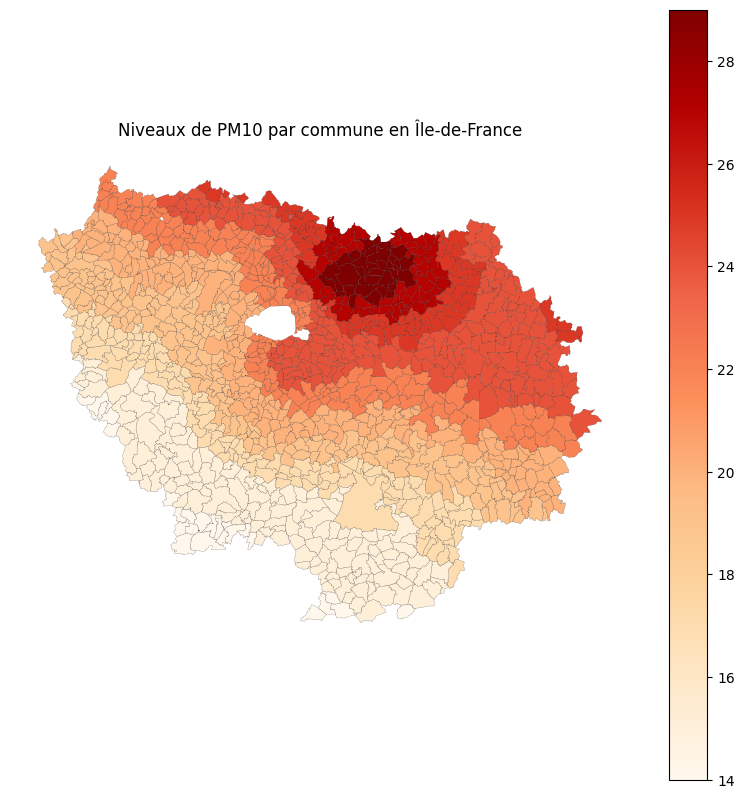

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
communes_idf_pollution.plot(
    column="pm10",
    legend=True,
    cmap="OrRd",  # rouge / orange
    ax=ax,
    edgecolor="black",
    linewidth=0.1
)

ax.set_title("Niveaux de PM10 par commune en Île-de-France")
ax.axis("off")

In [28]:

import numpy as np

# On crée un df avec le taux de pauvreté (si connu) et la pollution (variable binaire), et on le nettoie
communes_idf_reg_pollution = communes_idf_pollution.copy()
communes_idf_reg_pollution = communes_idf_reg_pollution[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021', 'pm10']]
communes_idf_reg_pollution = communes_idf_reg_pollution.rename(columns={"TP6021" : "taux_pauvrete"})
communes_idf_reg_pollution["taux_pauvrete"] = communes_idf_reg_pollution["taux_pauvrete"].replace("s", np.nan
).str.replace(",", ".", regex = False).astype(float)

# On construit un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reg2_pauvrete_pollution = LinearRegression()
communes_idf_reg_pollution = communes_idf_reg_pollution.dropna(subset=["taux_pauvrete"])
reg2_pauvrete_pollution.fit(communes_idf_reg_pollution[["pm10"]],communes_idf_reg_pollution["taux_pauvrete"])
a = reg2_pauvrete_pollution.coef_
b = reg2_pauvrete_pollution.intercept_
print(a,b)

[0.53711051] 1.7413835854202802


In [29]:
# On teste statistiquement la significativité par un t-test
from scipy.stats import ttest_ind
pauvrete_polluee = communes_idf_reg_pollution.loc[communes_idf_reg_pollution["Polluee"] == 1, "taux_pauvrete"]
pauvrete_non_polluee = communes_idf_pollution_pauvrete.loc[communes_idf_pollution_pauvrete["Polluee"] == 0, "taux_pauvrete"]
t_stat, p_value = ttest_ind(pauvrete_polluee, pauvrete_non_polluee, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")

KeyError: 'Polluee'

In [30]:
communes_idf_pollution.columns

Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry', 'departement',
       'Polluee', 'P22_POP', 'P22_POP0014', 'P22_POP1529',
       ...
       'BPE_2024_D281', 'BPE_2024_D307', 'BPE_2024_F307', 'date', 'no2', 'o3',
       'pm10', 'centroid', 'x', 'y'],
      dtype='object', length=1989)

In [31]:
## On crée un df avec nos variables d'intérêt (amené à s'élargir)
df_final = communes_idf_pollution.copy()
df_final = df_final[['insee', 'nom', 'surf_ha', 'geometry', 'departement', 'TP6021', 'MED21', 'SNEMM_23', 'P22_POP', 'Polluee', 'date', 'no2', 'o3',
       'pm10', 'centroid', 'x', 'y']]

In [69]:
df_final.head(20)

,insee,nom,surf_ha,geometry,departement,TP6021,MED21,SNEMM_23,P22_POP,Polluee,date,no2,o3,pm10,centroid,x,y
0,77024,Bassevelle,1751.0,"POLYGON ((717585.699 6867733.115, 717603.981 6...",77,s,24850,NaN,385.0,False,01/04/2018,11,35,24,POINT (720672.472 6869288.779),720672.472024,6.869289e+06
1,77414,Saint-Hilliers,1908.0,"POLYGON ((716091.521 6839155.684, 716183.702 6...",77,s,25320,NaN,479.0,False,01/04/2018,11,37,22,POINT (719015.297 6836558.103),719015.297294,6.836558e+06
2,77068,Cessoy-en-Montois,528.0,"POLYGON ((708710.354 6822889.465, 708755.119 6...",77,s,26430,NaN,213.0,False,01/04/2018,11,38,19,POINT (710258.625 6823065.778),710258.625496,6.823066e+06
3,77019,Balloy,1338.0,"POLYGON ((709399.55 6811789.55, 709406.246 681...",77,s,23710,NaN,351.0,False,01/04/2018,11,41,19,POINT (711202.325 6810765.613),711202.325208,6.810766e+06
4,77286,Meigneux,780.0,"POLYGON ((704231.763 6823864.26, 704232.716 68...",77,s,27690,NaN,234.0,False,01/04/2018,11,39,19,POINT (707177.905 6823703.51),707177.904889,6.823704e+06
5,77293,Misy-sur-Yonne,628.0,"POLYGON ((704911.455 6806370.754, 704934.68 68...",77,s,24790,NaN,857.0,False,01/04/2018,10,42,17,POINT (707040.769 6807244.588),707040.768994,6.807245e+06
6,77101,Châtenay-sur-Seine,1340.0,"POLYGON ((704939.119 6814066.434, 705104.363 6...",77,s,24140,NaN,1049.0,False,01/04/2018,10,41,19,POINT (707014.508 6813313.184),707014.508439,6.813313e+06
7,77467,La Tombe,784.0,"POLYGON ((705398.327 6809589.207, 705538.222 6...",77,s,23360,NaN,201.0,False,01/04/2018,10,42,17,POINT (706895.819 6809599.416),706895.818780,6.809599e+06
8,77131,Coulommiers,1093.0,"POLYGON ((705096.832 6856317.115, 705099.378 6...",77,"19,0",21030,2296.227997,15696.0,False,01/04/2018,14,35,24,POINT (706700.355 6856922.466),706700.354687,6.856922e+06
9,77448,Sept-Sorts,307.0,"POLYGON ((706850.869 6870320.2, 706866.261 687...",77,s,24130,NaN,597.0,False,01/04/2018,12,35,24,POINT (707736.376 6871100.544),707736.375852,6.871101e+06


In [32]:
## On cherche d'autres variables que la pauvreté (avec moins de NAs)

# REVENU MOYEN
communes_idf_pollution["SNEMM_23"].value_counts() # 0 "s"
communes_idf_pollution["SNEMM_23"].isna().sum() # 740 NAs
# ==> Au total, 740 manquants pour le revenu moyen

# REVENU MEDIAN
communes_idf_pollution["MED21"].value_counts() # 15 "s"
communes_idf_pollution["MED21"].isna().sum() # 0 NA
# ==> Au total, 15 manquants pour le revenu médian

# PAUVRETE
communes_idf_pollution["TP6021"].value_counts() # 800 "s"
communes_idf_pollution["TP6021"].isna().sum() # 0 NA
# ==> Au total, 800 manquants pour le revenu médian

## ==> On choisit le revenu médian pour estimer le niveau de vie

np.int64(0)

In [33]:
## Nettoyage du revenu médian

# on voit que ces villes ne sont décrites par aucune de nos trois variables (pauvreté et revenu moyen non plus) ; et sont très petites (max 70 habitants)
df_final[df_final['MED21'] == 's']

# on filtre donc notre df
df_final = df_final[df_final['MED21'] != 's']

df_final.shape

(1251, 17)

(np.float64(578677.6648573534),
 np.float64(748960.2127077241),
 np.float64(6773759.115010327),
 np.float64(6911676.700154755))

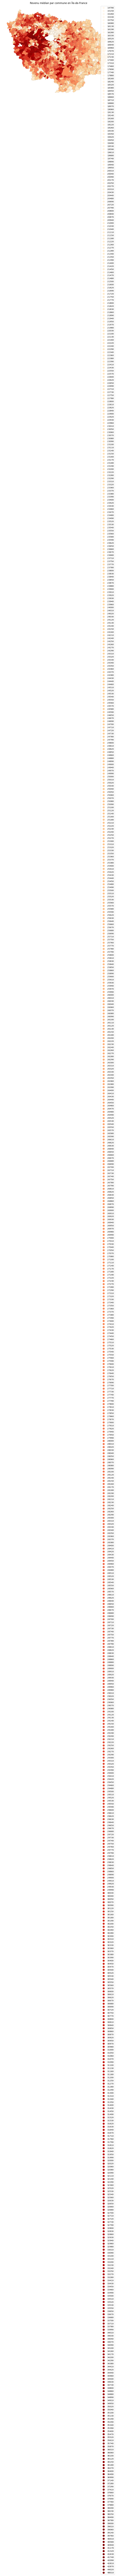

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
df_final.plot(
    column="MED21",
    legend=True,
    cmap="OrRd",  # rouge / orange
    ax=ax,
    edgecolor="black",
    linewidth=0.1
)

ax.set_title("Revenu médian par commune en Île-de-France")
ax.axis("off")

In [34]:
# on rajoute la variable site pollué
# depuis le site de Géorisques : https://www.georisques.gouv.fr/donnees/bases-de-donnees/sites-et-sols-pollues-ou-potentiellement-pollues
# Télécharger des données dans la base "Sites et sols pollués (ou potentiellement pollués)"

import requests

# Téléchargement du fichier avec la localisation des installations industrielles rejetant des polluants, directement depuis le site Géorisques
url_sites_pollues = "https://www.georisques.gouv.fr/webappReport/ws/infosols/export/excel?codeRegion=11"
response_sites_pollues = requests.get(url_sites_pollues)

# Enregistrement du fichier localement
with open("sites_pollues.xlsx", "wb") as f:
    f.write(response_sites_pollues.content)




In [35]:
!pip install openpyxl
import openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [37]:
df_sites_pollues = pd.read_excel("sites_pollues.xlsx", sheet_name="Instructions")
df_sites_pollues[df_sites_pollues["Code INSEE"] == 75056]

/opt/python/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Code métier,Autre identifiant,Nom établissement,Nom instruction,Statut instruction,Date début,Date fin,Description,Code INSEE,Nom commune,Nom département,Nom région,Géolocalisation,Coordonnée X,Coordonnée y,Code ICPE,NAF,NAF Rev1,NAF Rev2
256,SSP000158001,NaN,NaN,Station-service AAS CARBURANTS,Clôturée,NaT,NaT,La société AAS Carburants exploitait à cette a...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.365690,48.848137,NaN,NaN,NaN,NaN
258,SSP000158601,75.0011,NaN,GSTS QUALITE OR,En cours,NaT,NaT,La mise en sécurité du site (interdiction de l...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.361608,48.862520,NaN,NaN,NaN,NaN
259,SSP000159001,75.0012,NaN,CPCU VILLETTE,En cours,NaT,NaT,Dans le cadre de la cessation de ses activités...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.384242,48.890038,NaN,NaN,NaN,NaN
260,SSP000159201,75.0007,NaN,ex SOCIETE DECORELEC,En cours,NaT,NaT,"Suite à la cessation d'activités en 1992, un a...",75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.389190,48.887420,NaN,NaN,NaN,NaN
261,SSP000161801,NaN,NaN,Les Garages Modernes de Paris,Clôturée,NaT,NaT,La société Les Garages Modernes de Paris explo...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.305170,48.889660,NaN,NaN,NaN,NaN
263,SSP000162301,NaN,NaN,DELEK FRANCE,Clôturée,NaT,NaT,La société Delek France exploitait à cette adr...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.312128,48.896343,NaN,NaN,NaN,NaN
267,SSP000165701,NaN,NaN,Galvano Force Industrie,Clôturée,NaT,NaT,La société Galvano Force Industrie (GFI) a exp...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.371275,48.865177,NaN,NaN,NaN,NaN
269,SSP000166201,NaN,NaN,ERDF,Clôturée,NaT,NaT,La société ERDF exploitait à cette adresse plu...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.395948,48.853176,NaN,NaN,NaN,NaN
273,SSP000289701,NaN,NaN,Garage HORIZON,Clôturée,NaT,NaT,Un garage automobile abritant une installation...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.332064,48.825634,NaN,NaN,NaN,NaN
278,SSP000290301,NaN,NaN,Oil France Soult,Clôturée,NaT,NaT,La société OIL FRANCE a exploité sur le site u...,75056,PARIS,PARIS,ILE-DE-FRANCE,Polygone,2.409919,48.845173,NaN,NaN,NaN,NaN


In [41]:
df_communes_polluees = (
    df_sites_pollues
    .groupby("Code INSEE")
    .size()
    .reset_index(name="nb_sites_pollues")
    .rename(columns={"Code INSEE": "insee"})
)

df_communes_polluees["est_pollue"] = "oui"

df_communes_polluees = df_communes_polluees[["insee", "est_pollue", "nb_sites_pollues"]]

df_communes_polluees



,insee,est_pollue,nb_sites_pollues
0,75056,oui,49
1,75104,oui,1
2,75107,oui,1
3,75110,oui,2
4,75111,oui,2
...,...,...,...
486,95641,oui,1
487,95658,oui,1
488,95675,oui,1
489,95678,oui,1


In [50]:
df_final["insee"] = df_final["insee"].astype(str).str.zfill(5)
df_communes_polluees["insee"] = df_communes_polluees["insee"].astype(str).str.zfill(5)

df_final_2 = pd.merge(
    df_final,
    df_communes_polluees,
    on= "insee")

df_final_2.head()


,insee,nom,surf_ha,geometry,departement,TP6021,MED21,SNEMM_23,P22_POP,Polluee,date,no2,o3,pm10,centroid,x,y,est_pollue,nb_sites_pollues
0,77068,Cessoy-en-Montois,528.0,"POLYGON ((708710.354 6822889.465, 708755.119 6...",77,s,26430,NaN,213.0,False,01/04/2018,11,38,19,POINT (710258.625 6823065.778),710258.625496,6.823066e+06,oui,1
1,77131,Coulommiers,1093.0,"POLYGON ((705096.832 6856317.115, 705099.378 6...",77,"19,0",21030,2296.227997,15696.0,False,01/04/2018,14,35,24,POINT (706700.355 6856922.466),706700.354687,6.856922e+06,oui,8
2,77448,Sept-Sorts,307.0,"POLYGON ((706850.869 6870320.2, 706866.261 687...",77,s,24130,NaN,597.0,False,01/04/2018,12,35,24,POINT (707736.376 6871100.544),707736.375852,6.871101e+06,oui,3
3,77051,Bray-sur-Seine,218.0,"POLYGON ((716945.495 6813118.404, 716999.505 6...",77,"16,0",20690,2155.624093,2378.0,False,01/04/2018,11,38,19,POINT (717967.103 6812656.308),717967.103365,6.812656e+06,oui,1
4,77320,Mouroux,1673.0,"POLYGON ((700722.087 6858998.5, 700725.88 6859...",77,"8,0",24940,2256.289551,5869.0,False,01/04/2018,14,35,24,POINT (703723.679 6858570.58),703723.679048,6.858571e+06,oui,1


In [59]:
## On fait une régression logistique

df_final_2 = df_final_2.rename(columns={"TP6021" : "taux_pauvrete"})
df_final_2["taux_pauvrete"] = df_final_2["taux_pauvrete"].replace("s", np.nan
).replace(",", ".", regex = False).astype(float)
import statsmodels.api as sm
y_polluee_idf = df_final_2["nb_sites_pollues"] # variable "expliquée"
X_pauvrete_idf = df_final_2["taux_pauvrete"] # variable "explicative"
X_pauvrete_idf = sm.add_constant(X_pauvrete_idf) # on ajoute l'intercept
lm_model = sm.lm(y_polluee_idf, X_pauvrete_idf)
result = lm_model.fit()
print(result.summary())
# Coefficients du modèle
params = result.params
# Odd-ratios
odds_ratios = np.exp(params)
print("Odds ratios :")
print(odds_ratios)
#IC des odd-ratios
conf = result.conf_int()
conf_odds_ratios = np.exp(conf)
conf_odds_ratios.columns = ["2.5%", "97.5%"]
print("\nIntervalles de confiance des odds ratios :")
print(conf_odds_ratios)
# Pseudo R^2
pseudo_r2 = 1 - result.llf / result.llnull
print("\nPseudo R² (McFadden) :", pseudo_r2)


AttributeError: module 'statsmodels.api' has no attribute 'lm'